# <center><b> LOAN APPROVAL PREDICTION </b></center>
<style> p {text-align: justify;}</style>
<p>This notebook is based on the loan approval prediction - <a href="https://www.kaggle.com/ninzaami/loan-predication/home"> [Loan Prediction] </a> dataset. Loan approvals are a popular problem in the credit/banking industry. Loan approval in financial organizations is one of the challenges that affect operational financial processes because of inaccurate forecasts or lack of information. Therefore, loan prediction based on the information provided and collected is essential in this regard. How can we correctly predict if the loan is safe to be approved or not? This is what we will be looking into in this notebook.</p>

## **A. Import Packages and Dataset**

### 1. Import Packages

In [1]:
import pandas as pd             # Package for data processing
# Packages for visualization
import matplotlib.pyplot as plt 
import seaborn as sns
# Packages for prediction algorithm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
# Package for model evaluation
from sklearn.model_selection import cross_val_score

### 2. Import Dataset

In [2]:
# Read CSV data
data = pd.read_csv("dataset/dataset_loan_approval.csv")

## **B. Data Exploration**

### 1. Data Understanding

In [3]:
data.head() # Preview data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Descriptive data for numerical features
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
# Descriptive data for categorical features
data.describe(include="object")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


<style> p {text-align: justify;}</style>
<p>From preview data, we can see all features in this dataset:

1. **Gender**: Male/Female (Basic Information)

2. **Married**: Yes/No (This is noted to check the dependecy as well as the liabilities of the candidate)

3. **Dependents**: Number of Dependents (This is again recorded to check the liabilities of the candidate)

4. **Education**: Graduate/Not Graduate (This helps the lender understand the loan repayment capacity of the candidate)

5. **Self Employment**: Yes/No (This keeps a check on the flow of income of the borrower)

6. **Applicant Income** and **Co-applicant Income**: Number (This helps to understand the loan repayment capacity of the borrower)

7. **Loan Amount**: Number (This helps the lender understand the feasibility of the repayment of the borrower)

8. **Loan Amount Term**: Number (This helps the lender to calculate the total interest with the principal amount)

9. **Credit History**: Number (This helps the lender understand the feasibility of the repayment of the borrower)

10. **Property Area**: Urban/Rural/Semi-Urban (This helps the lender understand the standard of living of the borrower)

11. **Loan Status**: Y/N (This is the final decision made by the lender) </p>

In [6]:
def check_data(data):
    return (pd.DataFrame({'type':data.dtypes, 
                         'amount_unique':data.nunique(), 
                         'unique_values':[data[x].unique() for x in data.columns],
                         'missing_values':data.isna().sum(),
                         'percentage_missing_values(%)':round((data.isnull().sum()/data.shape[0])*100, 2)
                         }))
check_data(data)

,type,amount_unique,unique_values,missing_values,percentage_missing_values(%)
Loan_ID,object,614,"[LP001002, LP001003, LP001005, LP001006, LP001...",0,0.00
Gender,object,2,"[Male, Female, nan]",13,2.12
Married,object,2,"[No, Yes, nan]",3,0.49
Dependents,object,4,"[0, 1, 2, 3+, nan]",15,2.44
Education,object,2,"[Graduate, Not Graduate]",0,0.00
Self_Employed,object,2,"[No, Yes, nan]",32,5.21
ApplicantIncome,int64,505,"[5849, 4583, 3000, 2583, 6000, 5417, 2333, 303...",0,0.00
CoapplicantIncome,float64,287,"[0.0, 1508.0, 2358.0, 4196.0, 1516.0, 2504.0, ...",0,0.00
LoanAmount,float64,203,"[nan, 128.0, 66.0, 120.0, 141.0, 267.0, 95.0, ...",22,3.58
Loan_Amount_Term,float64,10,"[360.0, 120.0, 240.0, nan, 180.0, 60.0, 300.0,...",14,2.28


<style> p {text-align: justify;}</style>
<p>We can see that there are 7 features that have missing values. These features are:

1. Gender : 2.12%

2. Married : 0.49%

3. Dependents : 2.44%

4. Self_Employed : 5.21%

5. LoanAmount : 3.58%

6. Loan_Amount_Term : 2.28%

7. Credit_History : 8.14%

The percentage indicates the number of missing values in each features and should be considered before making predictions. This is important because mishandling can result in imbalances in the dataset, thus affecting the predictions made by the machine learning model. We need to handle the missing values for each features before modeling.</p>

### 2. Data Preparation

<p>Here we try to identify each feature to determine how to handle missing data from our data set. Missing data can be caused by various reasons such as: 

1. Improper test design
2. Failure in observation
3. Failure to record observations

The process of identifying and correcting missing data is important because:

1. It can affect the results of ML model decisions because it can reduce the accuracy model.
2. It can make the model fixed on one class, where all data points are present. This also leads to inaccuracies that cannot be recorded.

Therefore, the best thing to do is to always check the amount of missing data such as:

1. If the amount of missing data is a lot, then a possible solution is to impute the missing places by taking the row/column average (numerical features) or taking the most values in a column (categorical features).
2. If the amount of missing data is small, then the missing rows can be deleted.</p>

**a. Visualization of Gender**

Number of people who take a loan group by 'Gender':
Male      489
Female    112
Name: Gender, dtype: int64


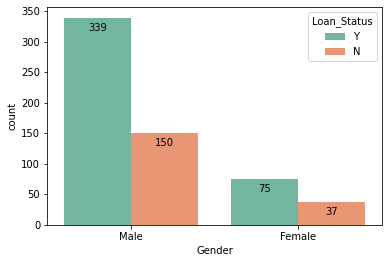

In [7]:
print("Number of people who take a loan group by 'Gender':")
print(data['Gender'].value_counts())
ax = sns.countplot(x='Gender', hue="Loan_Status", data=data, palette = 'Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, -10), textcoords='offset points')

**b. Visualization of Marrital Status**

Number of people who take a loan group by 'Marrital Status':
Yes    398
No     213
Name: Married, dtype: int64


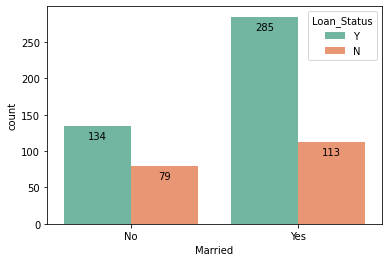

In [8]:
print("Number of people who take a loan group by 'Marrital Status':")
print(data['Married'].value_counts())
ax = sns.countplot(x='Married', hue="Loan_Status", data=data, palette = 'Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, -10), textcoords='offset points')

**c. Visualization of Dependents**

Number of people who take a loan group by 'Dependents':
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


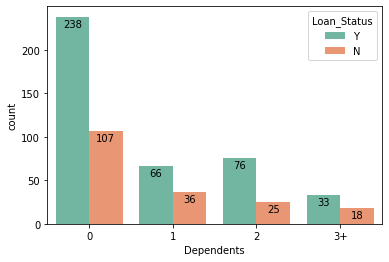

In [9]:
print("Number of people who take a loan group by 'Dependents':")
print(data['Dependents'].value_counts())
ax = sns.countplot(x='Dependents', hue="Loan_Status", data=data, palette = 'Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, -7), textcoords='offset points')

**d. Visualization of Education**

Number of people who take a loan group by 'Education':
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


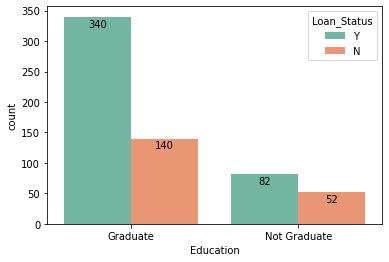

In [10]:
print("Number of people who take a loan group by 'Education':")
print(data['Education'].value_counts())
ax = sns.countplot(x='Education', hue="Loan_Status", data=data, palette = 'Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, -7), textcoords='offset points')

**e. Visualization of Self Employed**

Number of people who take a loan group by 'Self Employed':
No     500
Yes     82
Name: Self_Employed, dtype: int64


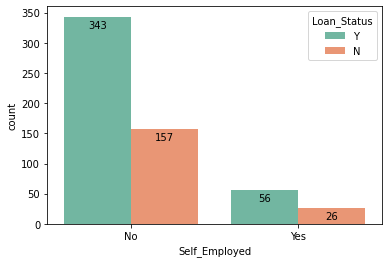

In [11]:
print("Number of people who take a loan group by 'Self Employed':")
print(data['Self_Employed'].value_counts())
ax = sns.countplot(x='Self_Employed', hue="Loan_Status", data=data, palette = 'Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, -8), textcoords='offset points')

**f. Visualization of Applicant Income**

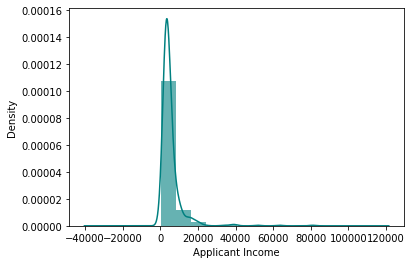

In [12]:
ax = data["ApplicantIncome"].hist(density=True, stacked=True, color='teal', alpha=0.6)
data["ApplicantIncome"].plot(kind='density', color='teal')
ax.set(xlabel='Applicant Income')
plt.show()

**g. Visualization of Co-Applicant Income**

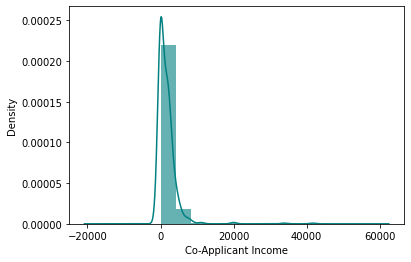

In [13]:
ax = data["CoapplicantIncome"].hist(density=True, stacked=True, color='teal', alpha=0.6)
data["CoapplicantIncome"].plot(kind='density', color='teal')
ax.set(xlabel='Co-Applicant Income')
plt.show()

**h. Visualization of Loan Amount**

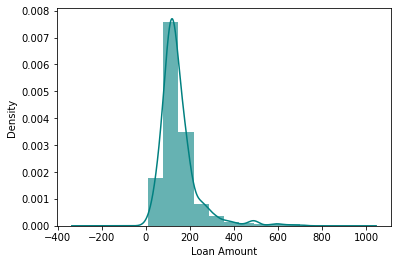

In [14]:
ax = data["LoanAmount"].hist(density=True, stacked=True, color='teal', alpha=0.6)
data["LoanAmount"].plot(kind='density', color='teal')
ax.set(xlabel='Loan Amount')
plt.show()

**i. Visualization of Loant Amount Term**

Number of people who take a loan group by 'Loan Amont Term':
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


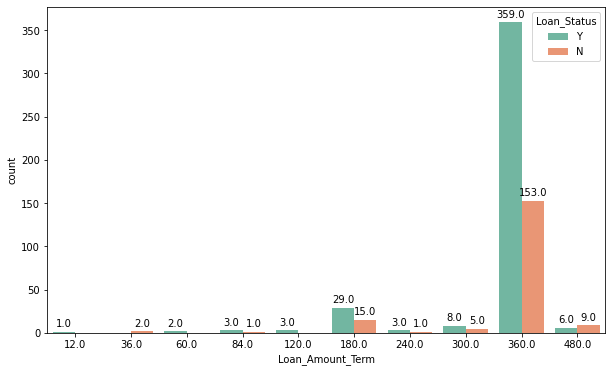

In [15]:
print("Number of people who take a loan group by 'Loan Amont Term':")
print(data['Loan_Amount_Term'].value_counts())
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Loan_Amount_Term', hue="Loan_Status", data=data, palette = 'Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

**j. Visualization of Credit History**

Number of people who take a loan group by 'Credit History':
1.0    475
0.0     89
Name: Credit_History, dtype: int64


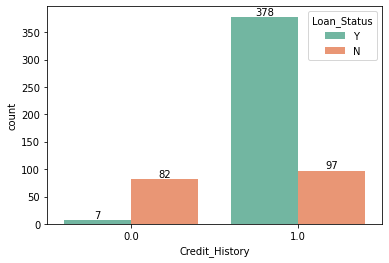

In [16]:
print("Number of people who take a loan group by 'Credit History':")
print(data['Credit_History'].value_counts())
ax = sns.countplot(x='Credit_History', hue="Loan_Status", data=data, palette = 'Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

**k. Visualization of Property Area**

Number of people who take a loan group by 'Property Area':
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


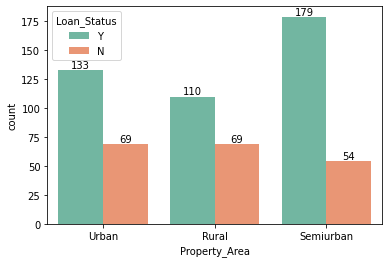

In [17]:
print("Number of people who take a loan group by 'Property Area':")
print(data['Property_Area'].value_counts())
ax = sns.countplot(x='Property_Area', hue="Loan_Status", data=data, palette = 'Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

<style> p {text-align: justify;}</style><p>After identifying the missing values of all the features, it turns out that there are quite a lot of them so we need to impute the missing values in each feature. Criteria for imputing data: 

1. If the feature is categorical (e.g. Gender whose unique values are Male and Female), we can impute it with the most frequently occurring category or its mode value.
2. If the feature is numeric (e.g. LoanAmount), we can impute the missing rows by taking the average or median of the whole feature.

<i>Note: Before we delete missing data/rows, we should only delete missing data if the number of missing rows is less. Deleting rows can solve the problem of missing data, but it also loses data related to other features in the row.</i>

Here are suggestions for data imputation on this notebook:
1. For "Gender", imputation is done by filling the data with Male (the most common answer).

2. For "Married", imputation is done by filling the data with Yes (the most common answer).

3. For "Dependents", imputation is done by filling the data with 0 (the most common answer).

4. For "Self_Employed", imputation is done by filling the data with No (the most common answer).

5. For "LoanAmount", imputation is done by filling the data with its average value.

6. For "Loan_Amount_Term", imputation is done by filling the data with 360 (the most common answer).

7. For "Credit_History", imputation is done by filling in the data with 1.0 (the most common answer).</p>

In [18]:
new_data = data.copy()
new_data['Gender'].fillna(new_data['Gender'].value_counts().idxmax(), inplace=True)
new_data['Married'].fillna(new_data['Married'].value_counts().idxmax(), inplace=True)
new_data['Dependents'].fillna(new_data['Dependents'].value_counts().idxmax(), inplace=True)
new_data['Self_Employed'].fillna(new_data['Self_Employed'].value_counts().idxmax(), inplace=True)
new_data["LoanAmount"].fillna(new_data["LoanAmount"].mean(skipna=True), inplace=True)
new_data['Loan_Amount_Term'].fillna(new_data['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)
new_data['Credit_History'].fillna(new_data['Credit_History'].value_counts().idxmax(), inplace=True)
# Check missing value
new_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### 4. Data Preprocessing

#### a. Converting Categorical Data into Numerical Data
<style> p {text-align: justify;}</style>
<p>The first step is to convert categorical data into numerical data. For example, the 'Gender' feature has two categories 'Male' and 'Female' which are converted to 1 and 0 respectively or the 'Property_Area' feature has three categories 'Urban', 'Semi-Urban', and 'Rural' which are converted to 0, 1, and 2 respectively.</p> 
<p>The reason for converting categorical data into numerical data is that machine learning models can only receive numbers and perform operations on them. Any data of any form (image, text, or audio) must be converted to numeric form before training the machine learning model.</p>

In [19]:
new_data['Gender'] = new_data['Gender'].replace({"Female": 0, "Male": 1})
new_data['Married'] = new_data['Married'].replace({'No' : 0,'Yes' : 1})
new_data['Dependents'] = new_data['Dependents'].replace({'0':0,'1':1,'2':2,'3+':3})
new_data['Education'] = new_data['Education'].replace({'Not Graduate' : 0, 'Graduate' : 1})
new_data['Self_Employed'] = new_data['Self_Employed'].replace({'No' : 0,'Yes' : 1})
new_data['Property_Area'] = new_data['Property_Area'].replace({'Semiurban' : 0, 'Urban' : 1,'Rural' : 2})
new_data['Loan_Status'] = new_data['Loan_Status'].replace({"N" : 0, "Y" : 1})

In [20]:
# Preview data information
check_data(new_data)

,type,amount_unique,unique_values,missing_values,percentage_missing_values(%)
Loan_ID,object,614,"[LP001002, LP001003, LP001005, LP001006, LP001...",0,0.0
Gender,int64,2,"[1, 0]",0,0.0
Married,int64,2,"[0, 1]",0,0.0
Dependents,int64,4,"[0, 1, 2, 3]",0,0.0
Education,int64,2,"[1, 0]",0,0.0
Self_Employed,int64,2,"[0, 1]",0,0.0
ApplicantIncome,int64,505,"[5849, 4583, 3000, 2583, 6000, 5417, 2333, 303...",0,0.0
CoapplicantIncome,float64,287,"[0.0, 1508.0, 2358.0, 4196.0, 1516.0, 2504.0, ...",0,0.0
LoanAmount,float64,204,"[146.41216216216216, 128.0, 66.0, 120.0, 141.0...",0,0.0
Loan_Amount_Term,float64,10,"[360.0, 120.0, 240.0, 180.0, 60.0, 300.0, 480....",0,0.0


#### b. Correlation of All Features
<style> p {text-align: justify;}</style>
<p>The next step is to look at the correlation between features. This is to find out how much correlation each feature has with the target, "Loan_Status", and can also determine the features that can affect the prediction results later. Pearson correlation is applied because it is easier and more widely used. The results of the correlation of each feature will be mapped in a Heatmap graph.</p>

<AxesSubplot:>

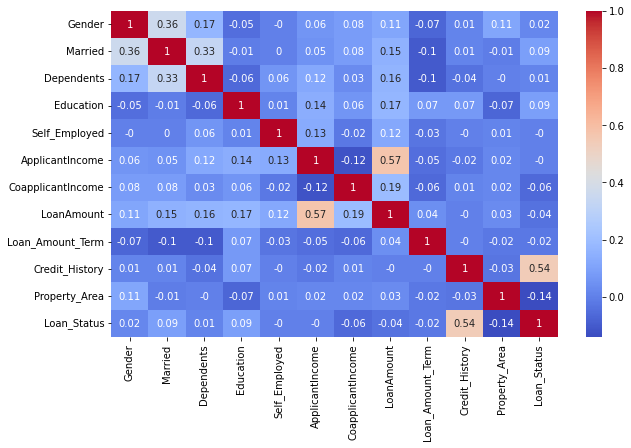

In [22]:
# Visualize Correlation of All Features with Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(round(new_data.corr(),2), annot=True, cmap="coolwarm")

<style> p {text-align: justify;}</style>
<p>From the results obtained, none of the correlation results against the target have a value above 0.7. This indicates a weak correlation or even no correlation between features and the target. Therefore, all these features will be used in predicting the results later.</p>

#### c. Split Features and Target
<style> p {text-align: justify;}</style>
<p>The last step at this stage is to separate the features from the target. Out of 11 features, the feature 'Loan_ID' was not taken into consideration. Therefore, only 10 other features are used in determining loan approval predictions.</p>

In [26]:
x = new_data.iloc[:,1:12]
y = new_data.iloc[:,12]
print("Shape of x ", x.shape)
print("Shape of y ", y.shape)
x.head()

Shape of x  (614, 11)
Shape of y  (614,)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1


In [27]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

## 6. Modeling for Prediction Loan Approval

## 7. Model Evaluation Result

## References:
1. S. M. Fati, "Machine Learning-Based Prediction Model for Loan Status Approval," *Journal of Hunan University Natural Sciences*, 48(10), 2021.

2. J. Heo and J. Y. Yang, "AdaBoost Based Bankruptcy Forecasting of Korean Construction Company," *Applied Soft Computing*, 24, 494-499, 2014.

3. C. F. Tsai, "Feature Selection in Bankruptcy Prediction," *Knowledge Based System*, 120-127, 2009.